# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

The goal of this task is to predict the SalesPrice variable for each id in the test set. Given that we are trying to predict the sales
price for each of the values in the test set the best task choice is regression. This model could be useful for many people who are
both looking to sell or buy their home and what features or characteristics tend to make a home sell for more money. This could be
important so sellers know what areas of their house are the most important to remodel, and so buyers can determine whether or not the
asking price for a house is too high or not. The main performance measure which will be evaluating this model is the RMSE between the logarithm of the predicted value and the logarithm of the observed sales price. All of the data has been collected and is located on the Kaggle URL provided to the class. This data contains 79 explanatory variables describing lots of aspects of residential homes in Ames, Iowa. Overall there are 1460 data entries in the testing data and another 1460 data entries in the training data. Given that this is a regression task we will probably want to use some form of Linear Regression modeling as we proceed forward, whether we choose to do classic Linear Regression, Decision Tree Regressor, Random Forest Regressor, or some other form of regression will be decided by which model performs the best and can generalize very well. In the end we will want to spend a reasonable amount of effort on this project to get a firm grasp on machine learning as well as producing a model that can somewhat accurately predict the Sales Price of homes. In step 3 we will work and visualize the data much more to ensure the above assumptions we made about the problem are correct.

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
# Scikit-Learn ≥0.20 is required
# common imports
import sklearn # general ml package
import numpy as np # fundamental package for scientific computing alias as np
import os # to run file I/O operation
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv("train.csv")
  return housing

housing = loadBostonHousingData()
# Data Size: 924KB (0.924MB)
# Data Entries: 1460
# Data Features: 81 total columns
# Yes there are categorical data types
# We can learn some very important numerical data for the columns that contain
# numerical information. We can also determine what the categories are for the
# categorical data.
# We can also see there are missing entries from .info() as we have 1460 entries
# and there are plenty of values that do not have 1460 non-null counts
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# we can immediately get some very useful feedback on lots of important numerical data for each columns here
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Yes there is categorical data types
housing["GarageType"].value_counts()

NameError: ignored

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [ ]:
# Your code to visualize the data here
corr_matrix = housing.corr()
corr_matrix.shape
corr_matrix

<ipython-input-4-5f636870b608>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [ ]:
# easily see which features are correlated with our predicted value "SalePrice"
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<Axes: xlabel='Id', ylabel='Id'>,
        <Axes: xlabel='MSSubClass', ylabel='Id'>,
        <Axes: xlabel='LotFrontage', ylabel='Id'>, ...,
        <Axes: xlabel='MoSold', ylabel='Id'>,
        <Axes: xlabel='YrSold', ylabel='Id'>,
        <Axes: xlabel='SalePrice', ylabel='Id'>],
       [<Axes: xlabel='Id', ylabel='MSSubClass'>,
        <Axes: xlabel='MSSubClass', ylabel='MSSubClass'>,
        <Axes: xlabel='LotFrontage', ylabel='MSSubClass'>, ...,
        <Axes: xlabel='MoSold', ylabel='MSSubClass'>,
        <Axes: xlabel='YrSold', ylabel='MSSubClass'>,
        <Axes: xlabel='SalePrice', ylabel='MSSubClass'>],
       [<Axes: xlabel='Id', ylabel='LotFrontage'>,
        <Axes: xlabel='MSSubClass', ylabel='LotFrontage'>,
        <Axes: xlabel='LotFrontage', ylabel='LotFrontage'>, ...,
        <Axes: xlabel='MoSold', ylabel='LotFrontage'>,
        <Axes: xlabel='YrSold', ylabel='LotFrontage'>,
        <Axes: xlabel='SalePrice', ylabel='LotFrontage'>],
       ...,
       [<Axes: x

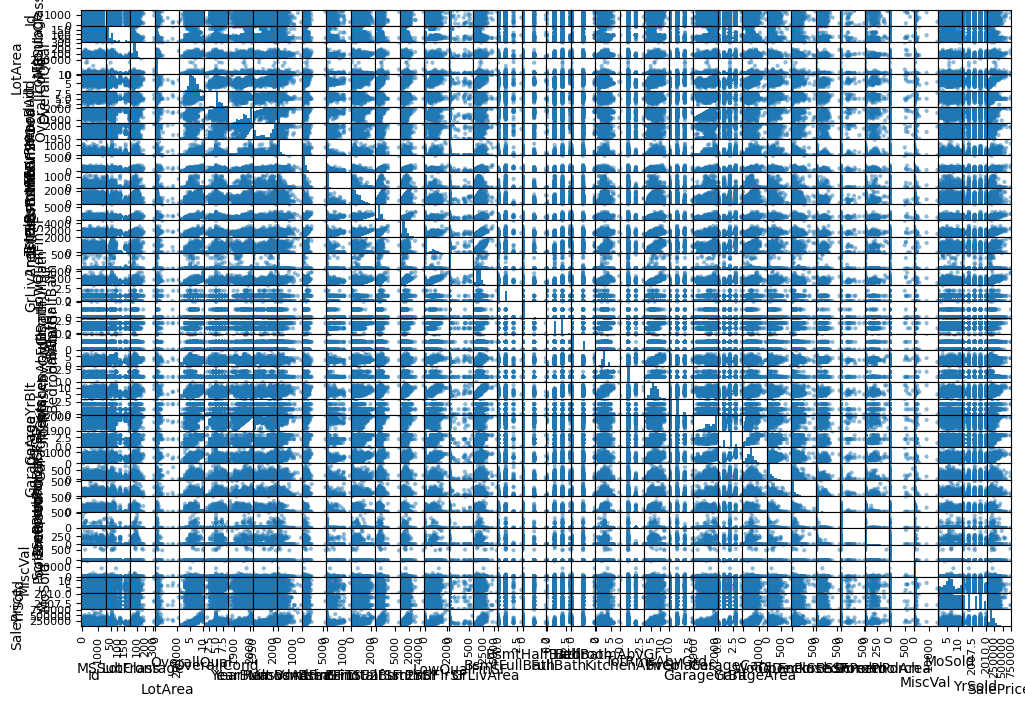

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

# this will generate a plot of all correlations like the prompt asked
# however the above two code cells will be more readable and usuable for
# confirming the weights of the regression models later on
scatter_matrix(housing, figsize=(12, 8))

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
# we should properly clean and scale all of the data first before parsing it into
# appropriately sized training, validation, and testing data

# ULTIMATELY WE JUST RUN THE PIPELINE BUT THIS IS GOOD FOR IMPORTING/INCREASING MY UNDERSTANDING

# THIS CELL ONLY PREPROCESSES NUMERICAL FEATURES
# Fill Missing Values with Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# this is selecting only the numerical data from housing
housing_num = housing.select_dtypes(include=[np.number])
# print out the housing num info
print(housing_num.info())
print("-----------------------------------------")

# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing_num[housing_num.isnull().any(axis=1)].head()
# print out a sample of the incomplete rows
print(sample_incomplete_rows)
print("-----------------------------------------")

# have the imputer fit and transform the data to fill any missing data
imputer.fit(housing_num)
# calculates all of the missing values in the pandas data frame using the strat you defined
missing = imputer.transform(housing_num)

# the variable missing is a plain numpy array but we want to put it back into a pandas data frame
housing_tr = pd.DataFrame(missing, columns=housing_num.columns, index=housing.index)
# checking to see that the values have been filled in
housing_tr.loc[sample_incomplete_rows.index.values]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
7,8.0,60.0,69.0,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,...,235.0,204.0,228.0,0.0,0.0,0.0,350.0,11.0,2009.0,200000.0
12,13.0,20.0,69.0,12968.0,5.0,6.0,1962.0,1962.0,0.0,737.0,...,140.0,0.0,0.0,0.0,176.0,0.0,0.0,9.0,2008.0,144000.0
14,15.0,20.0,69.0,10920.0,6.0,5.0,1960.0,1960.0,212.0,733.0,...,0.0,213.0,176.0,0.0,0.0,0.0,0.0,5.0,2008.0,157000.0
16,17.0,20.0,69.0,11241.0,6.0,7.0,1970.0,1970.0,180.0,578.0,...,0.0,0.0,0.0,0.0,0.0,0.0,700.0,3.0,2010.0,149000.0
24,25.0,20.0,69.0,8246.0,5.0,8.0,1968.0,2001.0,0.0,188.0,...,406.0,90.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,154000.0


In [ ]:
# THIS CELL IS DESIGNATED TO PREPROCESSING CATEGORICAL DATA
# ULTIMATELY WE JUST RUN THE PIPELINE BUT THIS IS GOOD FOR IMPORTING/INCREASING MY UNDERSTANDING
# getting all of the categorical data
housing_cat = housing.select_dtypes(include=[object])

from sklearn.preprocessing import OrdinalEncoder
# OrdinalEncoder encodes consecutive numbers for the categories (5 categories --> 0,1,2,3,4)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# make sure they have been encoded correctly
housing_cat_encoded[:10]

array([[ 3.,  1., nan,  3.,  3.,  0.,  4.,  0.,  5.,  2.,  2.,  0.,  5.,
         1.,  1., 12., 13.,  1.,  2.,  4.,  2.,  2.,  3.,  3.,  2.,  5.,
         1.,  0.,  1.,  4.,  2.,  6., nan,  1.,  1.,  4.,  4.,  2., nan,
        nan, nan,  8.,  4.],
       [ 3.,  1., nan,  3.,  3.,  0.,  2.,  0., 24.,  1.,  2.,  0.,  2.,
         1.,  1.,  8.,  8.,  2.,  3.,  4.,  1.,  2.,  3.,  1.,  0.,  5.,
         1.,  0.,  1.,  4.,  3.,  6.,  4.,  1.,  1.,  4.,  4.,  2., nan,
        nan, nan,  8.,  4.],
       [ 3.,  1., nan,  0.,  3.,  0.,  4.,  0.,  5.,  2.,  2.,  0.,  5.,
         1.,  1., 12., 13.,  1.,  2.,  4.,  2.,  2.,  3.,  2.,  2.,  5.,
         1.,  0.,  1.,  4.,  2.,  6.,  4.,  1.,  1.,  4.,  4.,  2., nan,
        nan, nan,  8.,  4.],
       [ 3.,  1., nan,  0.,  3.,  0.,  0.,  0.,  6.,  2.,  2.,  0.,  5.,
         1.,  1., 13., 15.,  2.,  3.,  4.,  0.,  3.,  1.,  3.,  0.,  5.,
         1.,  2.,  1.,  4.,  2.,  6.,  2.,  5.,  2.,  4.,  4.,  2., nan,
        nan, nan,  8.,  0.],
       [

In [ ]:
# Artifically split the train.csv data into a training set, validation set, and test set
from sklearn.model_selection import train_test_split
# Split the data into train set (80%), validation set (10%), test set (10%)
train_set, test_val_set = train_test_split(housing, test_size=0.2, random_state=21)
test_set, val_set = train_test_split(test_val_set, test_size=0.5, random_state=21)

# separate out the variable we are trying to predict from the rest of the data
train_set_features = train_set.drop("SalePrice", axis=1)
train_set_labels = train_set["SalePrice"].copy()

# checking the split happened properly
print(housing.shape)
print(train_set.shape)
print(test_set.shape)
print(val_set.shape)

# checking the labels and features were split appropriately
print("--------------------------------------")
train_set_features.info()
print("--------------------------------------")
train_set_labels.info()

(1460, 81)
(1168, 81)
(146, 81)
(146, 81)
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 710 to 969
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          73 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle    

In [ ]:
# We are going to create a pipeline that does the imputer and standardscaler
# in a more efficient manner. You can also write your own custom transformers to
# be added to the pipeline like in colab1 example notebook with combining attributes
# sometimes custom transformers can be useful and save a lot of coding time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# writing a numerical pipeline to deal with scaling and filling in null data
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# given that this data has null categorical values we will have to write a cat_pipeline
# to properly fill all missing categorical data and do the encoding
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('oneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
    ])

# creating housing_num and housing_cat
housing_num = train_set_features.select_dtypes(include=[np.number])
housing_cat = train_set_features.select_dtypes(include=[object])

# writing a full pipeline this tells which columns are categorical vs numerical
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

# when we call full_pipeline the num will be sent down num_pipeline and cat sent to OHE
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        # we need the handle_unknown is to prevent the pipeline from breaking
        # with new unseen categorical data. This is normally the best course of
        # action b/c we only want to pass model the training data and it needs to
        # be able to gracefully handle unseen categories on its own
        ("cat", cat_pipeline, cat_attribs),
    ])
# process and transform the training data via fit_transform()
# process and transform any validation and testing data via transform()
train_set_prepared = full_pipeline.fit_transform(train_set_features)

# we want to fit encoders and scalers and transform the training data, while
# not fitting only transforming the validation and testing data.
val_set_prepared = full_pipeline.transform(val_set)
test_set_prepared = full_pipeline.transform(test_set)

print(train_set_prepared.shape)
print(val_set_prepared.shape)
print(test_set_prepared.shape)
print("-----------------------------------------")
print(train_set_prepared)

(1168, 288)
(146, 288)
(146, 288)
-----------------------------------------
  (0, 0)	-0.06199558325070397
  (0, 1)	-0.6395048581289006
  (0, 2)	-0.6400969302558316
  (0, 3)	-0.6103903270059159
  (0, 4)	-2.2641590735147368
  (0, 5)	0.37168696394056916
  (0, 6)	-1.1828578434897854
  (0, 7)	0.8779189817647547
  (0, 8)	-0.5805251661141254
  (0, 9)	-0.9688297278701886
  (0, 10)	-0.2747417980834989
  (0, 11)	-0.6777359333550463
  (0, 12)	-1.8115327002213084
  (0, 13)	-1.1485018662340565
  (0, 14)	-0.7899672012141424
  (0, 15)	-0.12212671729432864
  (0, 16)	-1.5116252027553958
  (0, 17)	-0.8077767691883126
  (0, 18)	-0.23722597125670145
  (0, 19)	-1.0225572561842522
  (0, 20)	-0.7538302130935481
  (0, 21)	-1.0433492091364127
  (0, 22)	-0.21707778728127627
  (0, 23)	-0.9485940630028221
  (0, 24)	-0.9663710050956573
  :	:
  (1167, 171)	1.0
  (1167, 173)	1.0
  (1167, 178)	1.0
  (1167, 186)	1.0
  (1167, 190)	1.0
  (1167, 192)	1.0
  (1167, 195)	1.0
  (1167, 206)	1.0
  (1167, 208)	1.0
  (1167, 217)

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
# calculating the RMSE error for each of the cv models and then averaging them
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
# Here we will implement the Linear Regression Model
from sklearn.linear_model import LinearRegression

# taking the prepared data from above and combining it with the labels we split up from earlier
lin_reg = LinearRegression()
lin_reg.fit(train_set_prepared, train_set_labels)

# let's try the full preprocessing pipeline on a few training instances
# iloc is pandas functionality for integer indexing
some_data = train_set_features.iloc[:5]
some_labels = train_set_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)
print("Predictions:", lin_reg.predict(some_data_prepared))
# compare to the actual labels
print("Actual:", list(some_labels))
print("------------------------------------------------")

# calculating the RMSE for the Linear Regression Model
from sklearn.metrics import mean_squared_error

# make predictions on the prepared data set
housing_predictions = lin_reg.predict(train_set_prepared)
lin_mse = mean_squared_error(train_set_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
# with Ordinal Encoding and typical Linear Regression we get RMSE of 29,346 (could do better)
# with OneHotEncoding and typical Linear Regression we get RMSE of 18,707
print("RMSE:", lin_rmse)
print("------------------------------------------------")

# Must use 5-fold cross validation on data set to evaluate the performance of each model
# Cross-validation feature randomly splits the training set into n distinct subsets called folds,
# then it trains and evaluates the model n times, picking a different fold for evaluation every
# time and training on the other 9 folds. The result is an array containing the n evaluation scores

print("Performing 5-fold Cross Validation")

lin_scores = cross_val_score(lin_reg, train_set_prepared, train_set_labels,
                             scoring="neg_mean_squared_error", cv=5)
# converting -MSE to +RMSE
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
# with 5 fold CV we have a mean of 33,638 and stddev of 13,354


Predictions: [ 50103.21000298 125841.83945691 145671.09245651 219853.08257788
 221215.14625786]
Actual: [52000, 128000, 143000, 187000, 209500]
------------------------------------------------
RMSE: 18707.577141875885
------------------------------------------------
Performing 5-fold Cross Validation
Scores: [60624.81258266 31748.30193232 21123.29264979 29469.07698863
 33638.05087087]
Mean: 35320.707004855925
Standard deviation: 13354.394909364488


In [ ]:
# Implementing the DecisionTreeRegressor to see if this model performs better
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=21)
tree_reg.fit(train_set_prepared, train_set_labels)

# make predictions on the prepared data set
housing_predictions = tree_reg.predict(train_set_prepared)
tree_mse = mean_squared_error(train_set_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
# while this is saying RMSE has a value of 0, it is much more likely we overfit
# the model and we need to perform cross-validation with the val_set we made earlier
print("RMSE:", tree_rmse)
print("------------------------------------------------")

# Must use 5-fold cross validation on data set to evaluate the performance of each model
print("Performing 5-fold Cross Validation")
# cross validation data where they move the validation score across to get 10 different ones
# type of model you trained, data, labels, scoring, number of cv you want
scores = cross_val_score(tree_reg, train_set_prepared, train_set_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

# with 5-fold CV for decision tree we have a mean of 42,831 and stddev of 7670

RMSE: 0.0
------------------------------------------------
Performing 5-fold Cross Validation
Scores: [56246.72480258 39107.9088648  34101.21076309 38914.59618035
 45789.44964943]
Mean: 42831.9780520499
Standard deviation: 7669.979636534248


In [ ]:
# Lastly we are going to try a RandomForest Regressor
# this works by training many Decision Trees on random subsets of data and avg them
# called Ensemble Learning when you build models on top of other models
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=21)
forest_reg.fit(train_set_prepared, train_set_labels)

# calculating RMSE
housing_predictions = forest_reg.predict(train_set_prepared)
forest_mse = mean_squared_error(train_set_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)
print("------------------------------------------------")

# Need to perform 5-fold cross validation on all models to evaluate performance
forest_scores = cross_val_score(forest_reg, train_set_prepared, train_set_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

# this model got the mean down to 29726 and stddev to 5125

RMSE: 11048.438717722565
------------------------------------------------
Scores: [39017.08656827 30490.43455707 23728.77294001 28065.15493788
 27332.68935039]
Mean: 29726.827670723666
Standard deviation: 5125.655489416702


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [ ]:
# we will use two separate tools to try and find the best combo of hyperparameters and estimators
# will start off with GridSearchCV to see how this goes

# best of the 3 previous models was RandomForestRegressor so we will be tuning that model
from sklearn.model_selection import GridSearchCV

# fine tuning the model so that we find the best combination of hyperparameters and estimators
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=21)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_set_prepared, train_set_labels)

# figuring out the best combo for hyper+estimators
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print("-------------------------------------------")

# show the scores for each hyperparam combo tested during grid search
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

print("-------------------------------------------")

{'max_features': 8, 'n_estimators': 30}
RandomForestRegressor(max_features=8, n_estimators=30, random_state=21)
-------------------------------------------
47151.82282160634 {'max_features': 2, 'n_estimators': 3}
41058.91516746351 {'max_features': 2, 'n_estimators': 10}
38652.60691785124 {'max_features': 2, 'n_estimators': 30}
47460.27055607949 {'max_features': 4, 'n_estimators': 3}
38480.3672731341 {'max_features': 4, 'n_estimators': 10}
36057.55314114613 {'max_features': 4, 'n_estimators': 30}
44455.94797931599 {'max_features': 6, 'n_estimators': 3}
36624.413148858475 {'max_features': 6, 'n_estimators': 10}
34439.22888757642 {'max_features': 6, 'n_estimators': 30}
40242.87825408722 {'max_features': 8, 'n_estimators': 3}
35583.97312257058 {'max_features': 8, 'n_estimators': 10}
33916.225448623634 {'max_features': 8, 'n_estimators': 30}
47966.669809095634 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
39548.6983031466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 

In [ ]:
# Try and see if we can find a better combination with RandmoizedSearchCV
# this is a better option when the search space is large (often preferred)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=20),
    }

forest_reg = RandomForestRegressor(random_state=21)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=21)
rnd_search.fit(train_set_prepared, train_set_labels)

# display the scores for the 10 random ones this random search chose
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

33227.11207414216 {'max_features': 10, 'n_estimators': 57}
34523.29087461394 {'max_features': 5, 'n_estimators': 49}
30422.15124254094 {'max_features': 17, 'n_estimators': 121}
34889.36948830644 {'max_features': 4, 'n_estimators': 189}
36402.993740482496 {'max_features': 3, 'n_estimators': 73}
31126.129015495186 {'max_features': 15, 'n_estimators': 192}
31664.416495905636 {'max_features': 13, 'n_estimators': 62}
32394.613774201454 {'max_features': 10, 'n_estimators': 123}
30501.34522030073 {'max_features': 17, 'n_estimators': 101}
32938.73968210721 {'max_features': 7, 'n_estimators': 85}


In [ ]:
# Final Model with tweaked parameters

forest_reg = RandomForestRegressor(n_estimators=200, random_state=21, max_features=60)
forest_reg.fit(train_set_prepared, train_set_labels)

# calculating RMSE
housing_predictions = forest_reg.predict(train_set_prepared)
forest_mse = mean_squared_error(train_set_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)
print("------------------------------------------------")

# Need to perform 5-fold cross validation on all models to evaluate performance
forest_scores = cross_val_score(forest_reg, train_set_prepared, train_set_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


RMSE: 10572.300877284391
------------------------------------------------
Scores: [36480.07963551 28561.06321971 22269.01324591 30277.67300578
 23642.71747396]
Mean: 28246.10931617578
Standard deviation: 5078.220319994586


In [ ]:
# Final Model use our test data now
final_model = forest_reg
X_test = test_set.drop("SalePrice", axis=1)
y_test = test_set["SalePrice"].copy()

x_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

27990.932072403277


## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

Overall this model's final RMSE was 27990. This means on average the model is off by approximately 28,000 when predicting the final sale price. This is not the best, but as someone who has no background in Machine Learning it is a pretty good start. Overall the mean house Sale Price in Ames, Iowa is 181,000, so being within 28,000 is not bad but could be much better. From this problem I learned that cleaning data is rather time consuming, setting up pipelines vastly increases efficiency, different models can have wildly different results, and cross validation is a great way of comparing the performance across different models. Going forward if I have time I would like to research other models as the Linear had a base mean RMSE of 35,000, the DecisionTree had a base mean RMSE of 43,000, and the RandomForest had a base mean of 30,000. I think the best use of my time going forward would be to find other powerful models to help better the performance, and then from there continue by tweaking that model for best performance. I think a more powerful model combined with new features may help me the best. I would also be interested in seeing how tuning my hyperparamters would impact the final model.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!